## Part one

### Assume that the risk-free rate is 0.13% per month. Regress the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (alpha) and slope coefficient (beta) for each of the ten industry portfolios. Create a table showing the intercept and slope coefficients for the ten industry portfolios. Briefly explain the economic significance of the intercept and slope coefficients.


#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
import seaborn as sns
import quandl
from scipy.optimize import minimize
from pandas import Series
from pandas import DataFrame

#### import data

In [2]:
df = pd.read_csv('Industry_Portfolios.csv',index_col=0,parse_dates=True)
df

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [3]:
mk = pd.read_csv('Market_Portfolio.csv',index_col=0,parse_dates=True)
mk

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


#### import regression tools

In [4]:
import statsmodels.api as sm

In [5]:
mk_add_constant = sm.add_constant(mk)

In [6]:
stock_names  = df.columns

In [7]:
stock_names 

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth',
       'Utils', 'Other'],
      dtype='object')

#### Set risk free rate at 0.13 and run the regression of the monthly excess returns for each of the ten industry portfolios on the monthly excess returns for the market portfolio, so as to estimate the intercept coefficient (alpha) and slope coefficient (beta) for each of the ten industry portfolios.

In [8]:
rf = 0.13

In [9]:
model = sm.OLS(endog = df.iloc[:,0]-rf, exog = mk_add_constant-rf) 
result = model.fit()

In [10]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  NoDur   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     299.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           3.76e-34
Time:                        15:31:56   Log-Likelihood:                -238.91
No. Observations:                 120   AIC:                             481.8
Df Residuals:                     118   BIC:                             487.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4246      0.189      2.242      0.027       0.050       0.800
Market         0.6526      0.038     17.298      0.000       0.578       0.727
==============================================================================
Omnibus:                        4.017   Durbin-Watson:                   2.249
Prob(Omnibus):                  0.134   Jarque-Bera (JB):                4.043
Skew:                          -0.438   Prob(JB):                        0.132
Kurtosis:                       2.793   Cond. No.                         5.07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### write a for loop to run ten industry portfolios Simultaneously

In [11]:
import statsmodels.api as sm 

for stock in stock_names: 
    model = sm.OLS(endog = df[stock]-rf, exog = mk_add_constant-rf) 
    result = model.fit() 
    print(stock + '\n') 
    print(result.summary())
    print('\n\n')

NoDur

                            OLS Regression Results                            
Dep. Variable:                  NoDur   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     299.2
Date:                Mon, 26 Oct 2020   Prob (F-statistic):           3.76e-34
Time:                        15:31:56   Log-Likelihood:                -238.91
No. Observations:                 120   AIC:                             481.8
Df Residuals:                     118   BIC:                             487.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4246      0.189      2.242  

#### Print the result of  the intercept coefficient (alpha) and slope coefficient (beta) for each of the ten industry portfolios and also the t statistic respectively.

In [12]:
result_pd = []
result_td = []
result_rd = []

In [13]:
for stock in stock_names: 
    model = sm.OLS(endog = df[stock]-rf, exog = mk_add_constant-rf) 
    result = model.fit() 
    result_p = result.params
    result_t = result.tvalues
    result_r = result.rsquared
    result_pd.append(result_p)
    result_td.append(result_t)
    result_rd.append(result_r)


In [14]:
resultp = pd.DataFrame(result_pd)
resultt = pd.DataFrame(result_td)
resultr = pd.DataFrame(result_rd)

In [15]:
resultp = resultp.rename(columns = {'const': 'alpha', 'Market': 'Beta'}, inplace = False)
resultt = resultt.rename(columns = {'const': 'alpha_tstat', 'Market': 'Beta_tstat'}, inplace = False)
resultr = resultr.rename(columns = { 0 : 'adjust_R^2'}, inplace = False)


In [16]:
Name = ["NoDur",'Durbl','Manuf','Enrgy','HiTec','Telcm','Shops','Hlth','Utils','Other']
Name_table = pd.DataFrame(data = Name,columns = ['Company'])
table2=pd.concat([Name_table,resultp, resultt,resultr],axis=1)

In [17]:
table2 = table2.set_index('Company')

In [18]:
table2

,alpha,Beta,alpha_tstat,Beta_tstat,adjust_R^2
Company,,,,,
NoDur,0.424647,0.652647,2.242178,17.297886,0.717173
Durbl,-0.477700,1.648536,-1.037752,17.976662,0.732524
Manuf,0.183645,1.169846,1.112090,35.560094,0.914649
Enrgy,0.576688,0.969850,1.234586,10.422152,0.479307
HiTec,-0.073586,1.132969,-0.316681,24.474781,0.835429
Telcm,0.223783,0.900729,0.991417,20.030716,0.772740
Shops,0.316658,0.826492,1.509258,19.773563,0.768170
Hlth,0.273381,0.673036,1.065923,13.172510,0.595218
Utils,0.511017,0.538086,1.671817,8.836452,0.398214


### Q: Briefly explain the economic significance of the intercept and slope coefficients?

### A: Given the significance level of 5%, if the absolute value of t-stat for alpha is greater than the critical value. We can say that the alpha estimate is statistically significant.

### we all know that Alpha measures the amount that the investment has returned in comparison to the market index or other broad benchmark that it is compared against.

### In that circumstance, if alpha is positive, it means that the real expected return of the security is higher than the expected return given by the CAPM, and it also means the security is undervalued. If alpha is negative, it means that the real expected return of the security is lower than the expected return given by the CAPM, and it means overvalued.

### As for Beta, Beta measures the volatility of an investment. It is an indication of its relative risk. Since Market portfolio has Beta equal one, if Beta greater than one indicates that its price is more volatile than the market and vice versa.




## Part Two
### Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio. Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding betas


In [19]:
df_m = df.mean()

In [20]:
mk_m = mk.mean()

In [21]:
df_m

NoDur    0.902833
Durbl    0.733333
Manuf    1.012833
Enrgy    1.231167
HiTec    0.766250
Telcm    0.881417
Shops    0.916333
Hlth     0.783833
Utils    0.907167
Other    0.489083
dtype: float64

In [22]:
mean_return = pd.concat([df_m, mk_m], axis=0)

In [23]:
mean_return

NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
Market    0.748083
dtype: float64

In [24]:
Mean_table = pd.DataFrame(data = mean_return,columns = ['Mean Return'])
Mean_table

,Mean Return
NoDur,0.902833
Durbl,0.733333
Manuf,1.012833
Enrgy,1.231167
HiTec,0.766250
Telcm,0.881417
Shops,0.916333
Hlth,0.783833
Utils,0.907167
Other,0.489083


In [25]:
beta = table2['Beta']

In [26]:
# simple array 
data = np.array([1]) 
  
# providing an index 
ser = pd.Series(data, index =['Market']) 
print(ser) 

Market    1
dtype: int64


In [27]:
beta = pd.concat([beta, ser], axis=0)

In [28]:
Beta_table = pd.DataFrame(data = beta,columns = ['Beta'])
Beta_table

,Beta
NoDur,0.652647
Durbl,1.648536
Manuf,1.169846
Enrgy,0.969850
HiTec,1.132969
Telcm,0.900729
Shops,0.826492
Hlth,0.673036
Utils,0.538086
Other,1.207309


In [29]:
beta_add_constant = sm.add_constant(Beta_table)

In [30]:
model2 = sm.OLS(endog = Mean_table, exog = beta_add_constant) 
result_beta = model2.fit()

In [31]:
result_beta.summary()

/Users/willlee/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Mean Return   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.9679
Date:                Mon, 26 Oct 2020   Prob (F-statistic):              0.351
Time:                        15:31:56   Log-Likelihood:                 3.9339
No. Observations:                  11   AIC:                            -3.868
Df Residuals:                       9   BIC:                            -3.072
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0328      0.192      5.374      0.000       0.598       1.468
Beta          -0.1855      0.189     -0.984      0.351      -0.612       0.241
==============================================================================
Omnibus:                        2.793   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.247   Jarque-Bera (JB):                0.623
Skew:                           0.489   Prob(JB):                        0.732
Kurtosis:                       3.635   Cond. No.                         6.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
import statsmodels.api as sm
model2 = sm.OLS(endog = Mean_table, exog = beta_add_constant) 
p = model2.fit().params

In [33]:
p

const    1.032768
Beta    -0.185467
dtype: float64

### Using the estimated slope and intercept coefficients, plot the SML in the range of beta from zero to two on the horizontal axis. Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.) Briefly explain the economic significance of the SML.

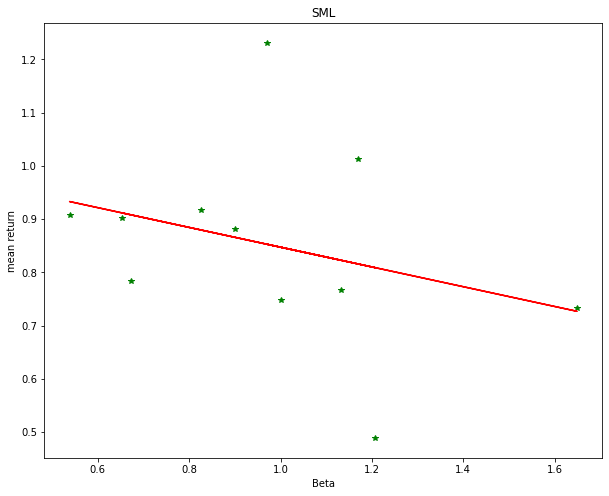

In [41]:
plt.figure(figsize=(10,8))
# scatter-plot data
plt.plot(Beta_table, Mean_table, 'b*',color = 'green')

plt.plot(beta, p.const + p.Beta * beta, color = 'red')

plt.xlabel('Beta')
plt.ylabel('mean return')  
plt.title('SML')
plt.show()

### Q: Briefly explain the economic significance of the SML.

### A: SML describes the relation between expected return and beta (or systematic risk) of a security or portfolio. Given the beta of a specific security or a portfolio in the market, then they can be priced. The slope represents risk premium per unit of market risk. 
### Ususally, if the assumption right, all tradable financial assets should have same Treynor ratio in equilibrium. However, in real market, if asset that lies above SML is underpriced, so investors should buy asset, causing price to rise and go back to the equilibrium. 
### Conversely, asset that lies below SML is overpriced, so investors should sell asset, causing price to fall and go back to the equilibrium. 
